Energy_Census

In [2]:
%matplotlib notebook

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


import matplotlib.style as style 
# style.available

In [4]:
plt.style.use('fast')

In [5]:
Data = pd.read_csv("Energy Census and Economic Data US 2010-2014.csv")
#Data.count()

In [10]:
Data_Reduced = Data[["State", "StateCodes", "Region", "Division", "Coast", "Great Lakes", 
                     "TotalC2010", "TotalC2011", "TotalC2012", "TotalC2013", "TotalC2014", 
                     "TotalP2010", "TotalP2011", "TotalP2012", "TotalP2013", "TotalP2014",
                     "TotalE2010", "TotalE2011", "TotalE2012", "TotalE2013", "TotalE2014",
                     "TotalPrice2010", "TotalPrice2011", "TotalPrice2012", "TotalPrice2013", "TotalPrice2014",
                     "POPESTIMATE2010", "POPESTIMATE2011", "POPESTIMATE2012", "POPESTIMATE2013", "POPESTIMATE2014"]]
Data_Reduced = Data_Reduced[Data_Reduced.State != "United States"] 
Data_Reduced = Data_Reduced[Data_Reduced.State != "District of Columbia"]
Data_Reduced = Data_Reduced.sort_values(by=['TotalC2010'], ascending=False)
Data_Reduced.head()

,State,StateCodes,Region,Division,Coast,Great Lakes,TotalC2010,TotalC2011,TotalC2012,TotalC2013,...,TotalPrice2010,TotalPrice2011,TotalPrice2012,TotalPrice2013,TotalPrice2014,POPESTIMATE2010,POPESTIMATE2011,POPESTIMATE2012,POPESTIMATE2013,POPESTIMATE2014
42,Texas,TX,3.0,7.0,1.0,0.0,11687521,11906249,11931169,12660976,...,17.36,20.55,19.10,19.08,19.05,25245717,25657477,26094422,26505637,26956958
4,California,CA,4.0,9.0,1.0,0.0,7760629,7777115,7564063,7665241,...,20.97,24.35,24.97,24.85,25.31,37336011,37701901,38062780,38431393,38802500
17,Louisiana,LA,3.0,7.0,1.0,0.0,4385758,4388867,4255161,4196622,...,15.06,17.96,15.46,15.67,15.49,4545581,4575972,4604744,4629284,4649676
8,Florida,FL,3.0,5.0,1.0,0.0,4282673,4141711,4029903,4076406,...,22.05,25.41,25.56,25.13,24.91,18852220,19107900,19355257,19600311,19893297
12,Illinois,IL,2.0,3.0,0.0,1.0,3955091,3937616,3820547,3991089,...,17.39,19.53,19.35,18.54,19.02,12840097,12858725,12873763,12890552,12880580


In [6]:
years = ["2010", "2011", "2012", "2013", "2014"]
years

['2010', '2011', '2012', '2013', '2014']

In [7]:
c = ['green', 'blue', 'red', 'orange']
c

['green', 'blue', 'red', 'orange']

In [11]:
# Partition data for scatter plot using region
Reg1 = Data_Reduced.loc[Data_Reduced["Region"] == 1.0, :]
Reg2 = Data_Reduced.loc[Data_Reduced["Region"] == 2.0, :]
Reg3 = Data_Reduced.loc[Data_Reduced["Region"] == 3.0, :]
Reg4 = Data_Reduced.loc[Data_Reduced["Region"] == 4.0, :]



In [24]:
# Reg1 - NE
BTUCap1 = Reg1["TotalC2014"]/Reg1["POPESTIMATE2014"]
Price1 = Reg1["TotalPrice2014"]
Pop1 = Reg1["POPESTIMATE2014"]
States1 = Reg1["StateCodes"]
Regions1 = Reg1["Region"]

# Reg2 - Central
BTUCap2 = Reg2["TotalC2014"]/Reg2["POPESTIMATE2014"]
Price2 = Reg2["TotalPrice2014"]
Pop2 = Reg2["POPESTIMATE2014"]
States2 = Reg2["StateCodes"]
Regions2 = Reg2["Region"]

# Reg3 - SE
BTUCap3 = Reg3["TotalC2014"]/Reg3["POPESTIMATE2014"]
Price3 = Reg3["TotalPrice2014"]
Pop3 = Reg3["POPESTIMATE2014"]
States3 = Reg3["StateCodes"]
Regions3 = Reg3["Region"]

# Reg4 - Western
BTUCap4 = Reg4["TotalC2014"]/Reg4["POPESTIMATE2014"]
Price4 = Reg4["TotalPrice2014"]
Pop4 = Reg4["POPESTIMATE2014"]
States4 = Reg4["StateCodes"]
Regions4 = Reg4["Region"]

print(len(BTUCap1))
print(len(Price1))
print(len(Pop1))

9
9
9


<IPython.core.display.Javascript object>


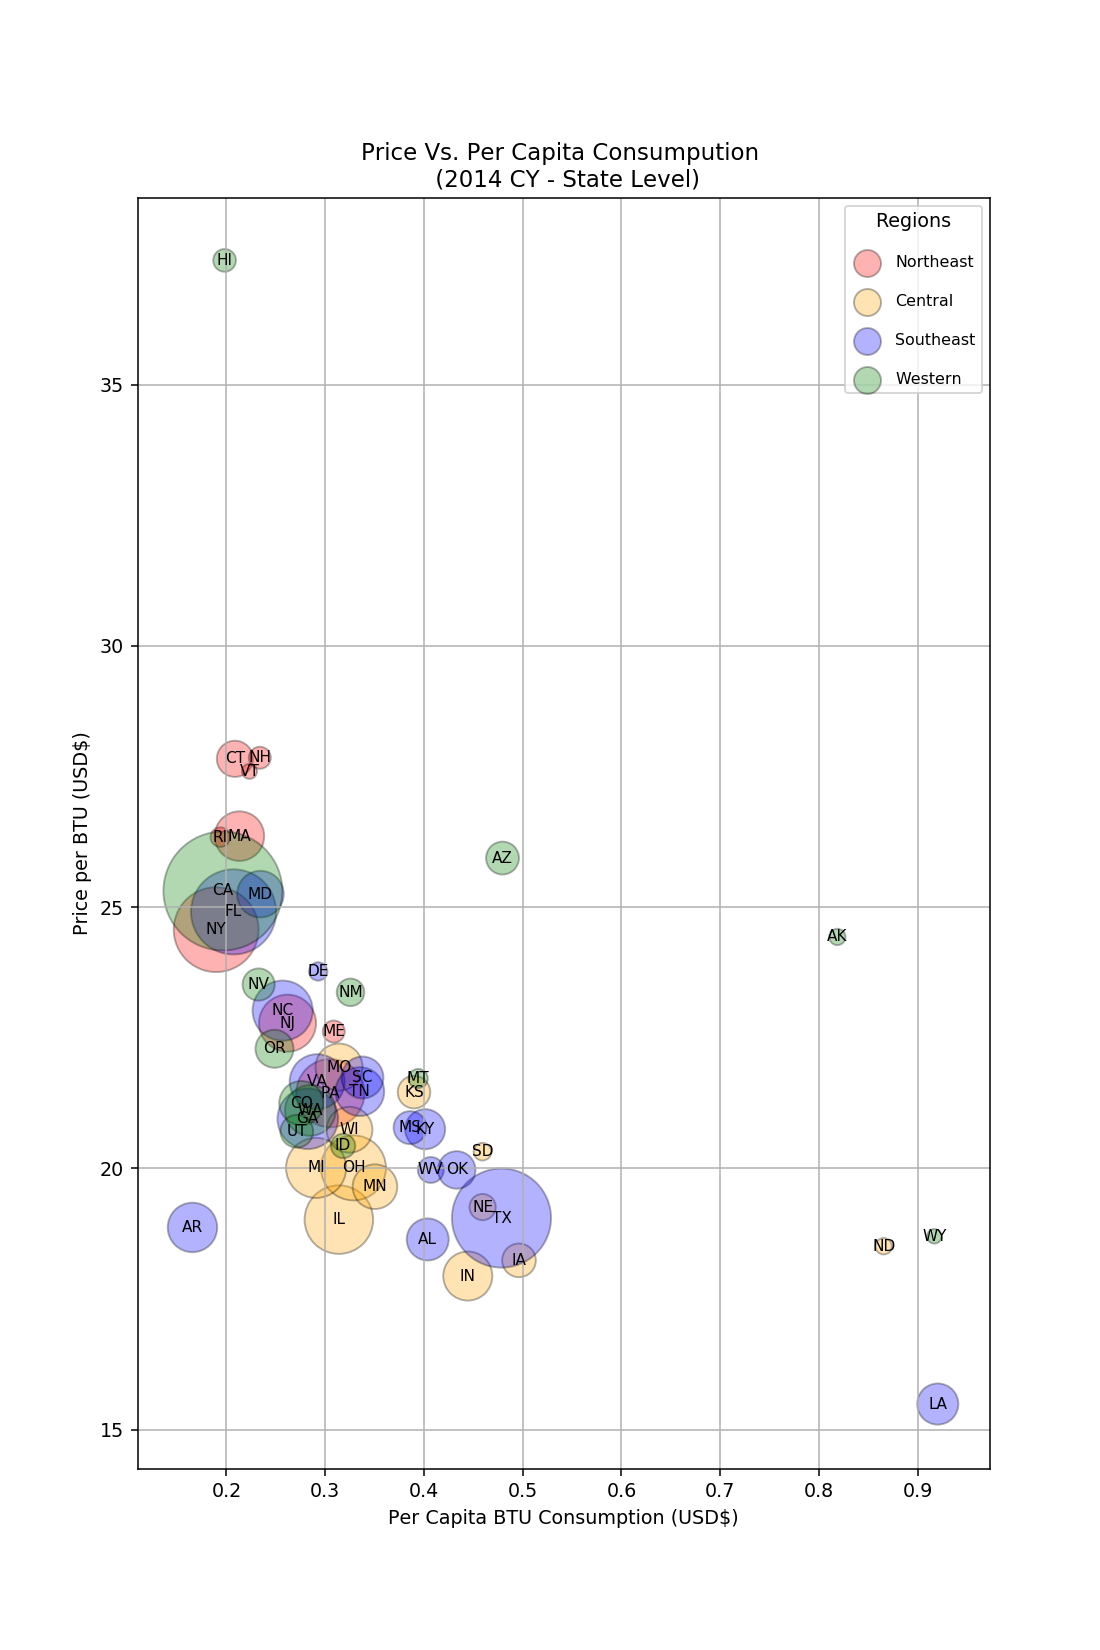

In [25]:
# Loop through each year creating plots 
#for year in years:

# Required for adding State Code Labels
BTUCap = Data_Reduced["TotalC2014"]/Data_Reduced["POPESTIMATE2014"]
Price = Data_Reduced["TotalPrice2014"]
Pop = Data_Reduced["TotalC2014"]/Data_Reduced["POPESTIMATE2014"]
States = Data_Reduced["StateCodes"]

plt.figure(figsize=(8,12))

# Region 1
plt.scatter(BTUCap1, Price1, s=Pop1/10000, c="red", marker="o", edgecolor="black", linewidths=1,
              alpha=0.3, label="Northeast")
# Region 2
plt.scatter(BTUCap2, Price2, s=Pop2/10000, c="orange", marker="o", edgecolor="black", linewidths=1,
              alpha=0.3, label="Central")
# Region 3       
plt.scatter(BTUCap3, Price3, s=Pop3/10000, c="blue", marker="o", edgecolor="black", linewidths=1,
              alpha=0.3, label="Southeast")
# Region 4        
plt.scatter(BTUCap4, Price4, s=Pop4/10000, c="green", marker="o", edgecolor="black", linewidths=1,
              alpha=0.3, label="Western")
        
# Loop through States and assign state label
for i in range(len(States)):
    plt.annotate(States[i], xy=(BTUCap[i], Price[i]), fontsize=8, 
                 horizontalalignment='center', verticalalignment='center')   

# Add circle color legend
lgnd = plt.legend(fontsize="small", numpoints=1, scatterpoints=1,
                   loc="best", title="Regions", labelspacing=1.5)
lgnd.legendHandles[0]._sizes = [200]
lgnd.legendHandles[1]._sizes = [200]
lgnd.legendHandles[2]._sizes = [200]
lgnd.legendHandles[3]._sizes = [200]

# Diplay results
plt.tight_layout
plt.title("Price Vs. Per Capita Consumpution \n (2014 CY - State Level)")
plt.ylabel("Price per BTU (USD$)")
plt.xlabel("Per Capita BTU Consumption (USD$)")
plt.grid()
plt.show()

SaveFile=("Output/temp2014_State")
plt.savefig(SaveFile)

In [187]:
# Tip
# Helpful ways to get current figure and current axis from most recent plot
# plt.gcf()
# plt.gca()